In [1]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
uri_to_data_frame = "https://raw.githubusercontent.com/sherri-ice/DataAnalyseProject/main/dataframe.csv"
data_frame =  pd.read_csv(uri_to_data_frame)
data_frame

,Отметка времени,Ваш пол,Ваш факультет,Ваш средний балл,"Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)",Ваш знак зодиака,Как часто Вы пьёте алкоголь?,Как часто Вы курите (сигареты/вейп/кальян)?,Как часто Вы пьёте кофе/энергетики?,Работаете ли Вы на данный момент?,Как часто Вы посещаете пары?,Сколько Вы спите в будний день?,Были ли у Вас серьёзные мысли об отчислении?,"Были ли у Вас мысли о суициде, была ли депрессия?",Болели ли Вы Covid-19?,Как часто Вы ходите в библиотеку?,Кем Вы себя считаете?,Состоите ли Вы в Студенческом союзе или похожих организациях?,Есть ли у Вас хобби вне университета?,Есть ли у Вас отношения?,Занимаетесь ли Вы спортом?,Вы учитесь на платной или бесплатной основе?,Количество пересдач за всё время обучения,Вы натуральный блондин
0,2021/11/26 12:21:04 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,Нет(
1,2021/11/26 12:21:41 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре",Платно,1-5 пересдач,Нет(
2,2021/11/26 12:21:57 PM GMT+3,Мужской,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Интроверт,Нет,Да,Нет,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
3,2021/11/26 12:22:31 PM GMT+3,Женский,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел","Редко, 1-2 раза в месяц",Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),"Да, на всю страну такой один"
4,2021/11/26 12:22:53 PM GMT+3,Мужской,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Экстраверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2021/12/05 12:48:57 AM GMT+3,Мужской,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Экстраверт,Да,Да,Да,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
230,2021/12/05 1:45:07 PM GMT+3,Женский,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,Нет,Да,"Да, до поступления",Не хожу в библиотеку,Амбиверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
231,2021/12/05 8:54:15 PM GMT+3,Женский,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел",Не хожу в библиотеку,Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
232,2021/12/06 3:36:11 AM GMT+3,Мужской,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Да,Да,Да,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,Нет(


#Чистим датасет

Переименуем колонки для более компактного кода

In [3]:
data_frame.rename(columns = {'Отметка времени':'time', \
                             'Ваш пол':'gender', \
                             'Ваш факультет': 'faculty',\
                             'Ваш средний балл': 'average_grade',
                             'Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)':'study_time',\
                             'Ваш знак зодиака': 'zodiac_sign',\
                             'Как часто Вы пьёте алкоголь?': 'alcohol',\
                             'Как часто Вы курите (сигареты/вейп/кальян)?': 'smoke',\
                             'Как часто Вы пьёте кофе/энергетики?': 'coffee',\
                             'Работаете ли Вы на данный момент?': 'work', \
                             'Как часто Вы посещаете пары?': 'attendance', \
                             'Сколько Вы спите в будний день?': 'sleep',\
                             'Были ли у Вас серьёзные мысли об отчислении?':'expulsion', \
                             'Были ли у Вас мысли о суициде, была ли депрессия?': 'depression',
                             'Болели ли Вы Covid-19?': 'covid19',
                             'Как часто Вы ходите в библиотеку?': 'library_attendance',\
                             'Кем Вы себя считаете?': 'person_type', \
                             'Состоите ли Вы в Студенческом союзе или похожих организациях?': 'student_union', \
                             'Есть ли у Вас хобби вне университета?': 'hobby',\
                             'Есть ли у Вас отношения?': 'relationship',\
                             'Занимаетесь ли Вы спортом?': 'sport',\
                             'Вы учитесь на платной или бесплатной основе?': 'education_type', \
                             'Количество пересдач за всё время обучения': 'failed_exams',
                             'Вы натуральный блондин': 'blond'},\
                             inplace=True)


Удалим столбец с временем заполнения формы, он нас не интересует:

In [4]:
data_frame = data_frame.drop('time', axis = 1)

В некотрых столбцах заменим данные типа Да/Нет на True/False. Помимо этого для столбца `covid19` в опросе уточнялось, когда именно вы болели: до поступления или во время вашего студенчества. Мы решаем, что нам важнее просто информация о том, болел ли человек, поэтому заменяем оба этих варианта на True.

In [5]:
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Да, во время студенчества', 'Да, до поступления', 'Да', 
                                                                                                                           'Да, на всю страну такой один'], True)
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Нет, не болел', 'Нет', 'Нет('], False)

В колонке `gender` помимо вариантов ответа "мужской", "женский", мы получили несколько неопределенных вариантов, которые для нас равносильны `Nan`. Просто выкинуть их из датасета мы не можем, так как нам важна остальная информация в этих строчках.

In [6]:
data_frame.gender

0      Предпочитаю не говорить (подаюсь в гугл)
1      Предпочитаю не говорить (подаюсь в гугл)
2                                       Мужской
3                                       Женский
4                                       Мужской
                         ...                   
229                                     Мужской
230                                     Женский
231                                     Женский
232                                     Мужской
233                                     Женский
Name: gender, Length: 234, dtype: object

Так как корректных данных в колонке гораздо больше, мы решили невалидные данные заменить в том же процентном отношении, в котором сейчас находятся ответы Мужской / Женский.

In [7]:
data_frame['gender'].replace(['Мужской'], 'm', inplace = True)
data_frame['gender'].replace(['Женский'], 'f', inplace = True)
gender = data_frame.loc[:, 'gender']
gender = DataFrame(gender.value_counts())

num_of_men = gender.loc['m']
num_of_women = gender.loc['f']
percent_of_men = num_of_men / (num_of_women + num_of_men)
num_of_men = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] * percent_of_men) 
num_of_women = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] - num_of_men)

In [8]:
data_frame.gender.replace(['Предпочитаю не говорить (подаюсь в гугл)'], np.nan, inplace = True)
print('Уникальные поля до замены ', data_frame.gender.unique())
data_frame.gender.fillna('m', limit = num_of_men, inplace = True)
print('Уникальные поля после замены части Nan-ов ', data_frame.gender.unique())
data_frame.gender.fillna('f', limit = num_of_women, inplace = True)
print('Уникальные поля после замены всех некорректных данных ', data_frame.gender.unique())

Уникальные поля до замены  [nan 'm' 'f']
Уникальные поля после замены части Nan-ов  ['m' 'f' nan]
Уникальные поля после замены всех некорректных данных  ['m' 'f']


Рассмотри колонку `faculty`. Из графика видно, что получилось неоднородная выборка по факультетам университета. Поэтому в дальнейшем учитывать принадлежность к факультету мы не будем.

<BarContainer object of 15 artists>

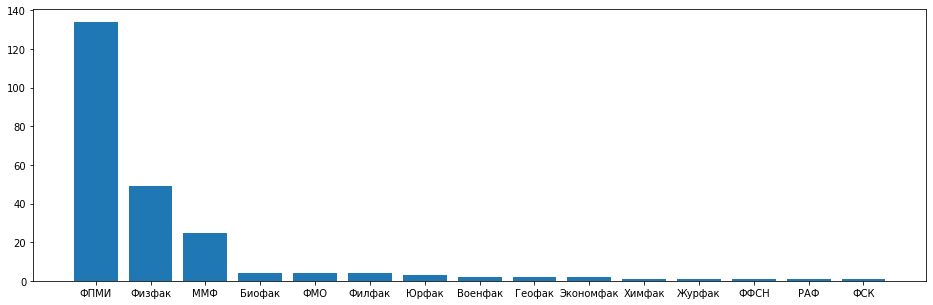

In [9]:
plt.figure(figsize=(16, 5))
unique_faculty = data_frame.faculty.value_counts()
plt.xticks(np.arange(unique_faculty.index.size), unique_faculty.index)
plt.bar(range(data_frame.faculty.unique().size), data_frame.faculty.value_counts())

In [10]:
data_frame

,gender,faculty,average_grade,study_time,zodiac_sign,alcohol,smoke,coffee,work,attendance,sleep,expulsion,depression,covid19,library_attendance,person_type,student_union,hobby,relationship,sport,education_type,failed_exams,blond
0,m,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,False
1,m,ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре",Платно,1-5 пересдач,False
2,m,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Интроверт,False,True,False,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
3,f,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,True,True,False,"Редко, 1-2 раза в месяц",Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),True
4,m,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Экстраверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,m,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Экстраверт,True,True,True,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
230,f,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,False,True,True,Не хожу в библиотеку,Амбиверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
231,f,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,True,True,False,Не хожу в библиотеку,Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
232,m,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,True,True,True,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,False


# Анализ успеваемости

Для начала посмотрим на результаты по успеваемости опроса и найдем среднюю успеваемость.

<BarContainer object of 5 artists>

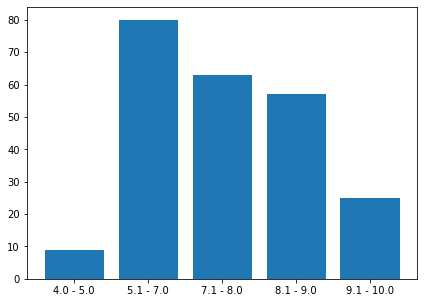

In [11]:
plt.figure(figsize=(7, 5))
grades = data_frame.average_grade.value_counts()
grades = grades.reindex(['4.0 - 5.0', '5.1 - 7.0','7.1 - 8.0', '8.1 - 9.0', '9.1 - 10.0'])
plt.xticks(np.arange(grades.index.size), grades.index)
plt.bar(range(data_frame.average_grade.unique().size), grades)

Так уж вышло, что данные по успеваемости были собраны в интервальном виде, а не в численном. Единственное, что мы пока можем сказать, это то, что наиболее часто встречающийся интервал по успеваемости [5.1 - 7.0]. Даже сказать, что данные по успеваемости обладают положительной ассиметрией будет неправильно, хоть и хочется так сделать, смотря на график.
Существуют специальные формулы, позволяющие вычислить моду, медиану и среднее для интервальных данных. Формула для вычисления моды:

$$ M = x_{M_0} + \frac{f_{M_0} - f_{M_0 - 1}}{(f_{M_0} - f_{M_0 - 1}) + (f_{M_0} - f_{M_0 + 1})} \cdot i_{M_0}$$ где $x_{M_0}$ - нижняя граница модального интервала,

$i_{M_0}$ - длина модального интервала,

$f_{M_0}$ - частота модального интервала,

$f_{M_0 - 1}$ - частота предыдущего интервала,

$f_{M_0 + 1}$ - частота следующего интервала.

Формула для вычисления медианы:

$$m = x_{M_0} + \frac{0.5n - N_{M_0 - 1}}{n_{M_0}} \cdot i_{M_0}$$

где $n$ - объем выборочной совокупности,

$x_{M_0}$ - нижняя граница медианного интервала,

$i_{M_0}$ - длина медианного интервала,

$n_{M_0}$ - частота медианного интервала,

$N_{M_0 - 1}$ - накопленная частота предыдущего интервала.

Для нахождения среднего, дисперсии и коэффициента ассиметрии каждый интервал заменяется на свою середину.







Усредним каждый интервал, найдем частоту и накопленную частоту для каждого интервала.

In [12]:
averaged_grades = {}
for i in grades.index:
  averaged_grades[i] = averaged_grades.get(i, 0) + (float(i.split(' - ')[0]) + float(i.split(' - ')[1]))/2

averaged_grades = DataFrame(Series(averaged_grades), columns = ['averaged_interval'])


frequency = np.array(grades)
accumulated_frequency = np.arange(5)
sum = 0
i = 0
for num in frequency:
  sum += num
  accumulated_frequency[i] = sum
  i += 1

averaged_grades['frequency'] = frequency
averaged_grades['accumulated_frequency'] = accumulated_frequency

print(averaged_grades)

averaged_grades_in_array = []

averaged_grades.loc['4.0 - 5.0']['frequency']

for i in averaged_grades.index:
  averaged_grades_in_array = np.append(averaged_grades_in_array, np.repeat(averaged_grades.loc[i]['averaged_interval'], averaged_grades.loc[i]['frequency']))


            averaged_interval  frequency  accumulated_frequency
4.0 - 5.0                4.50          9                      9
5.1 - 7.0                6.05         80                     89
7.1 - 8.0                7.55         63                    152
8.1 - 9.0                8.55         57                    209
9.1 - 10.0               9.55         25                    234


Наш модальный интервал: 5.1 - 7.0. Длина модального интервала: 1,9. Наш медианный интервал: 7.1 - 8.0. Длина медианного интервала: 0.9.

In [13]:
i = 1
moda = 5.1 + 1.9 * (averaged_grades.iloc[i]['frequency'] - averaged_grades.iloc[i - 1]['frequency']) / (2 * averaged_grades.iloc[i]['frequency'] - 
                                                                                                        averaged_grades.iloc[i - 1]['frequency'] - averaged_grades.iloc[i + 1]['frequency'])
print('Мода ', moda)
j = 2
median = 5.1 + 1.9 * (0.5 * len(averaged_grades_in_array) - averaged_grades.iloc[j - 1]['accumulated_frequency']) / averaged_grades.iloc[j]['frequency']
print('Медиана ', median)
mean = np.mean(averaged_grades_in_array)
print('Среднее значение ', mean)
print('Выборочная дисперсия ', np.var(averaged_grades_in_array))
std = np.std(averaged_grades_in_array)
print('Выборочное среднее квадратическое отклонение ', std)
numerator = 1. / len(averaged_grades_in_array) * np.sum((averaged_grades_in_array - mean) ** 3)
denominator = (1. / len(averaged_grades_in_array) * np.sum((averaged_grades_in_array - mean) ** 2)) ** 1.5
skewness = numerator / denominator
print('Коэффициент ассиметрии: ', skewness)

Мода  6.632954545454545
Медиана  5.944444444444444
Среднее значение  7.37713675213675
Выборочная дисперсия  1.7680776992475717
Выборочное среднее квадратическое отклонение  1.3296908284438047
Коэффициент ассиметрии:  -0.0955926285840622


Полученная статистика показывает, что наши данные в принципе очень близки к нормальному распредлению.

Нормальное распрделения numpy на таком же размере массива даёт близкую к нашей разницу между модей, медианой и средним и так же дает ненулевой коэффициент ассиметрии.

In [14]:
normal = np.random.rand(len(averaged_grades_in_array))
print('Мода ', normal[np.argmax(np.unique(normal, return_counts=True)[0])])
print('Медиана ', np.median(normal))
print('Среднее значение ', np.mean(normal))
numerator = 1. / len(normal) * np.sum((normal - np.mean(normal)) ** 3)
denominator = (1. / len(normal) * np.sum((normal - np.mean(normal)) ** 2)) ** 1.5
skewness = numerator / denominator
print('Коэффициент ассиметрии: ', skewness)

Мода  0.47517050150532303
Медиана  0.4591822500973301
Среднее значение  0.48159692563859846
Коэффициент ассиметрии:  0.1795860472542009


# Анализ влияния формы обучения на успеваемость студента

Мы хотели изучить зависимость между успеваемостью студентов, количеством пересдач и обучением на платной или бесплатной основе.

In [15]:
education_type = data_frame.education_type.value_counts()

In [16]:
failed_exams = data_frame.failed_exams.value_counts()
print('Процент студентов, получавших пересдачи:', (failed_exams.loc['1-5 пересдач'] + failed_exams.loc['Больше 5 пересдач']) / len(data_frame.failed_exams) * 100)
print('Процент студентов, получивших больше 5 пересдач:', failed_exams.loc['Больше 5 пересдач'] / len(data_frame.failed_exams) * 100)

Процент студентов, получавших пересдачи: 21.367521367521366
Процент студентов, получивших больше 5 пересдач: 2.9914529914529915


Найдем приблизительный средний балл успеваемости для разных групп студентов по типу обучения. При этом объединять бесплатников не будем.

In [17]:
education_type_and_grades = data_frame.groupby(by = ['education_type'])['average_grade'].value_counts()
education_type_and_grades

mean_grades = {}
for i in education_type_and_grades.index:
  mean_grades[i[0]] = mean_grades.get(i[0], 0) + (float(i[1].split(' - ')[0]) + float(i[1].split(' - ')[1]))/2 * education_type_and_grades[i]
for key in mean_grades:
  mean_grades[key] /= education_type[key]

print('Средние баллы студентов:')
Series(mean_grades)
 

Средние баллы студентов:


Бесплатно, получаю стипендию    7.567838
Бесплатно, потерял стипендию    6.360526
Платно                          6.845000
dtype: float64

Из полученных результатов, видим, что у бесплатников, потерявших свою стипендия, средний балл практически на 1 ниже чем у остальных бесплатников. Да и средний балл платников также ниже. Что можно из этого понять? Большинство платников практически никак не мотивированы, чтобы усиленно работать ради оценок. 

Проверим, сколько бесплатников, в итоге смогли вернуть стипендию.

In [18]:
less_than_five, more_than_five = failed_exams.loc[['1-5 пересдач', 'Больше 5 пересдач']]
total = less_than_five + more_than_five
less_than_five, more_than_five = data_frame.loc[:, ['education_type', 'failed_exams']].set_index('education_type').loc['Платно'].value_counts().loc[['1-5 пересдач', 'Больше 5 пересдач']]
num_who_pays = less_than_five + more_than_five
statistic = data_frame.loc[:, ['education_type', 'failed_exams']].set_index('education_type').loc['Бесплатно, получаю стипендию'].value_counts()
less_than_five, more_than_five = statistic.loc[['1-5 пересдач', 'Больше 5 пересдач']]
print('Процент студентов, вернувших себе стипендию: ', (less_than_five + more_than_five) / (total - num_who_pays) * 100)

Процент студентов, вернувших себе стипендию:  48.64864864864865
